In [81]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
# create a dataframe to store the data across configs, trials, epochs for training and validation
df = pd.DataFrame(columns=['config', 'trial', 'train_loss', 'val_loss'])

In [101]:
# Open results file
with open('results/parsed_results.pkl', 'rb') as f:
    results = pickle.load(f)
print(len(results))
print(type(results))
print(results[0])

40
<class 'list'>
{'config': '[]', 'trial': 'a-1', 'train_loss': [0.5179904296630766, 0.47224826734603903, 0.40465665143891805, 0.44934356815931276, 0.48123870799090807], 'val_loss': [0.574093213648472, 0.5055218397015796, 0.5000413812479927, 0.5182757616332434, 0.4837693837516516]}


In [95]:
# Establish names for the different configurations
configs = {
  '[]': 'Baseline',
  '[\'layer1\', \'layer2\', \'layer3\', \'layer4\']': 'Full LI',
  '[\'layer1\', \'layer2\']': 'Front LI',
  '[\'layer3\', \'layer4\']': 'Back LI',
}

In [104]:
# Add results to the dataframe
df = pd.DataFrame(results, columns=['config', 'trial', 'train_loss', 'val_loss'])
df['config'] = df['config'].map(configs)


In [105]:
# Inspect resulting dataframe
print(df.head())

     config trial                                         train_loss  \
0  Baseline   a-1  [0.5179904296630766, 0.47224826734603903, 0.40...   
1  Baseline   a-2  [0.5696920541364973, 0.4777900847901658, 0.479...   
2  Baseline   a-3  [0.5712384277909267, 0.47552765566037924, 0.46...   
3  Baseline   a-4  [0.540704449720499, 0.4953149299069149, 0.4625...   
4  Baseline   a-5  [0.564789548334552, 0.47126094031079513, 0.479...   

                                            val_loss  
0  [0.574093213648472, 0.5055218397015796, 0.5000...  
1  [0.44286245874409536, 0.9551748124141137, 0.65...  
2  [0.5083442326020269, 0.519828885504343, 0.4852...  
3  [0.5719443313705111, 0.5046295477348623, 0.489...  
4  [0.5573689807387232, 0.525217486961374, 0.4629...  


In [125]:
def plot_losses(df, title, loss_type='train_loss', trial_batch=None):
    plt.figure()
    for config in df['config'].unique():
        config_data = df[df['config'] == config]
        if trial_batch is not None:
            # Filter for trials with batch in the trial number
            config_data = config_data[config_data['trial'].str.contains(trial_batch)]
        specific_loss = config_data[loss_type].values
        specific_loss = np.array([np.array(loss) for loss in specific_loss])

        # Take the mean and standard deviation
        mean_losses = np.mean(specific_loss, axis=0)
        std_losses = np.std(specific_loss, axis=0)
        
        # Plot with error bars
        label = f'{config} (n={specific_loss.shape[0]})'
        plt.errorbar(range(len(mean_losses)), mean_losses, yerr=std_losses, label=label, capsize=5)
    plt.xlabel('Epoch')
    plt.xticks(np.arange(0, 5))
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.title(title)
    plt.show()

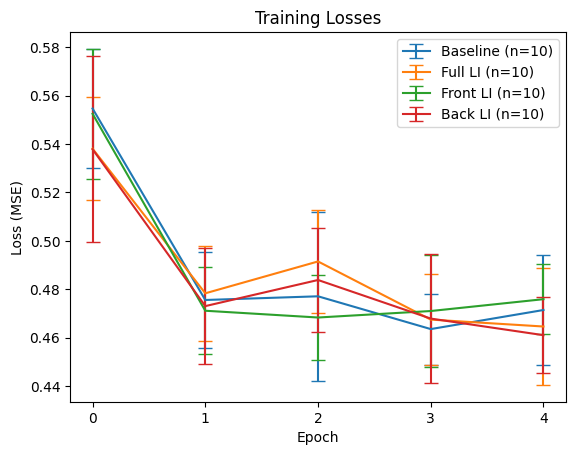

In [123]:
plot_losses(df, 'Training Losses', 'train_loss')

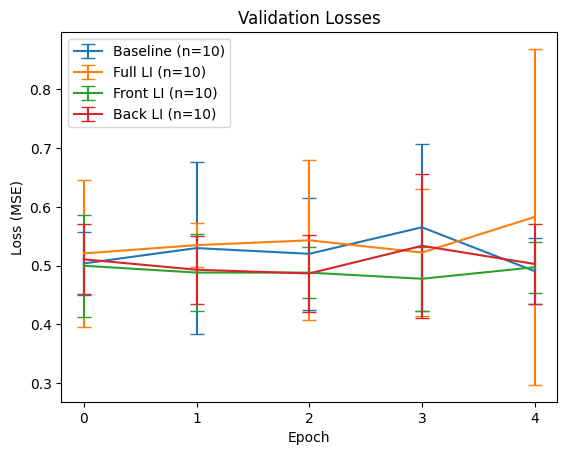

In [120]:
plot_losses(df, 'Validation Losses', 'val_loss')

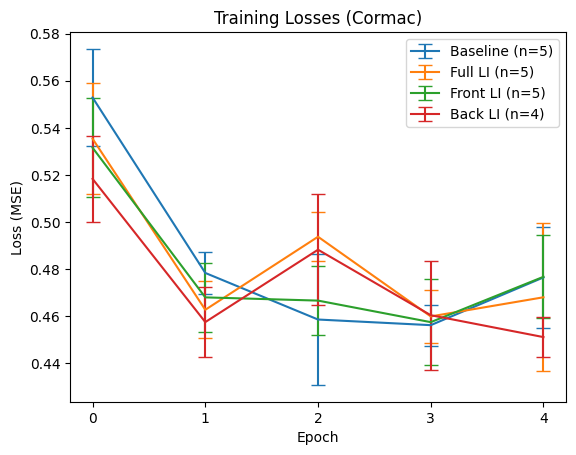

In [126]:
plot_losses(df, 'Training Losses (Cormac)', 'train_loss', 'a')

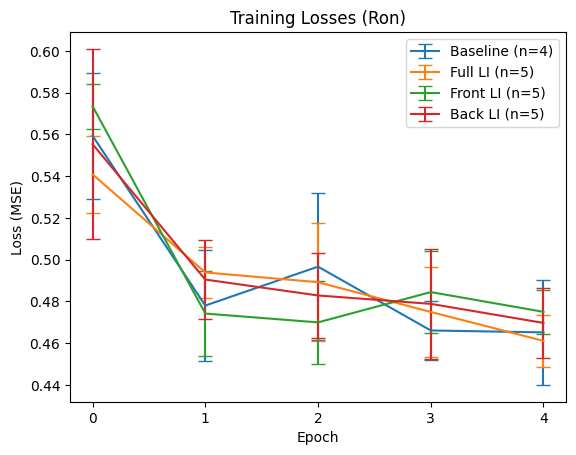

In [127]:
plot_losses(df, 'Training Losses (Ron)', 'train_loss', 'b')

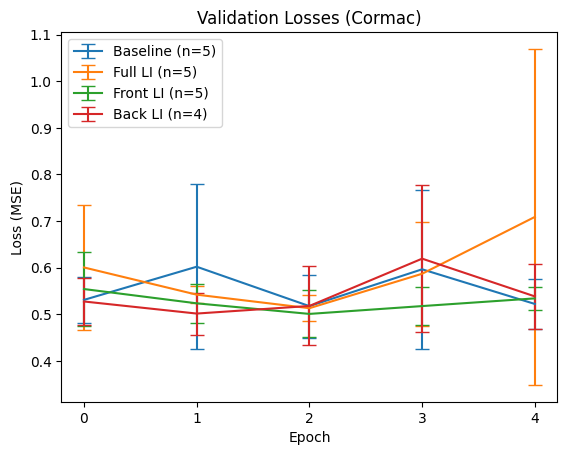

In [128]:
plot_losses(df, 'Validation Losses (Cormac)', 'val_loss', 'a')

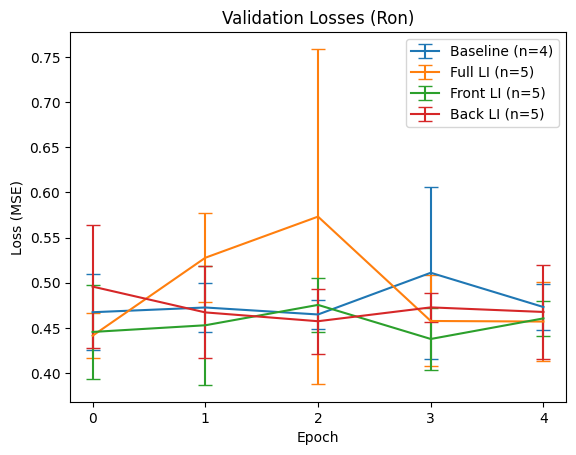

In [129]:
plot_losses(df, 'Validation Losses (Ron)', 'val_loss', 'b')